![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Integrais difíceis

Vimos em aula que os métodos de "alta ordem" convergem mais rápido quando a função é várias vezes diferenciável.
Neste teste, vamos olhar a situação contrária:
vamos integrar funções que não são
- diferenciáveis
- contínuas

no intervalo de integração, e ver como os métodos se comportam!

In [75]:
# Métodos do retângulo, ponto médio e simpson.
# Nomes: retangulo, midpoint, simpson
# Forma: (f,a,b,n=100)

def retangulo(f, a, b, n=100):
    h = (b - a) / n
    particao = np.arange(a, b, h)
    return np.sum(f(particao) * h)

def midpoint(f, a, b, n=100):
    h = (b - a) / n
    particao_inicio = np.arange(a, b, h)
    # particao_fim = np.arange(a + h, b + h, h)
    particao_fim = particao_inicio + h
    return np.sum(f((particao_inicio + particao_fim)/2)*h)

def simpson(f, a, b, n=100):
    h = (b - a) / n
    particao_inicio = np.arange(a, b, h)
    # particao_fim = np.arange(a + h, b + h, h)
    particao_fim = particao_inicio + h
    return np.sum((f(particao_inicio) + 4*f((particao_inicio + particao_fim)/2) + f(particao_fim))*h/6)

methods = [retangulo, midpoint, simpson]

# Parte 1: Integrando uma função que não é diferenciável

In [76]:
def df(f,x,h=2**-17):
    """17*3 = 54"""
    return (f(x+h) - f(x-h))/(2*h)

In [77]:
f = np.abs

## Questão 1: Dê uma primitiva de $f$.

In [78]:
def F(x):
    if np.isscalar(x):
        if x == 0:
            return 0
        return (x/np.abs(x)) * np.power(x, 2)/2
    xx = x
    evals = xx != 0
    xx[evals] = (xx[evals]/np.abs(xx[evals])) * np.power(xx[evals], 2)/2
    return xx

In [79]:
assert np.abs(df(F,1) - 1) < 1e-12

In [80]:
assert np.abs(df(F,-2) - 2) < 2e-12

In [81]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(F,xs) - f(xs))/f(xs)
assert np.all(np.abs(relerr) < 2e-11)

$F$ é diferenciável em zero, mas é uma conta difícil

In [82]:
df(F,0)

3.814697265625e-06

## Questão 2: Convergência das integrais

A que velocidade decai o erro de integração de $f$ no intervalo $[0,1]$?

1. Faça um gráfico com alguns valores de $n$, para observar a ordem dos três métodos
    - Dica: `f.__name__` dá o nome de uma função, para você usar na legenda
2. Depois, dê a ordem do método do retângulo

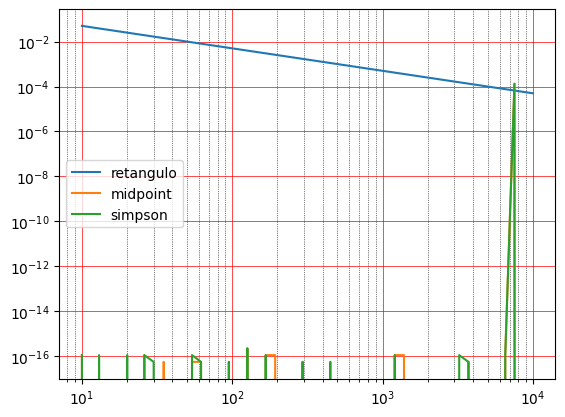

In [83]:
ans = F(1) - F(0)
ns = np.logspace(1,4,dtype=int)

fig, ax = plt.subplots()

for m in methods:
    erros = np.array([np.abs(m(f, 0, 1, n)-ans) for n in ns])
    plt.loglog(ns, erros, label=m.__name__)

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()
plt.show()

In [84]:
# Forma da resposta: decay_speed = n
decay_speed = 1

In [85]:
for n in np.random.randint(100,10000, size=(6)):
    I1 = retangulo(f,0,1,n)
    err1 = np.abs(I1 - ans)
    I2 = retangulo(f,0,1,2*n)
    err2 = np.abs(I2 - ans)
    assert np.abs( err2/err1 - 2**-decay_speed ) < 2*n*1e-14

Explique porque o teste está dando a ordem de convergência (Bônus)

No Método do Retângulo, o decaimento do erro é diretamente proporcional ao comprimento do intervalo h da partição (que é igual a $i = \frac{a - b}{n}$), ou seja, é diretamente proporcional ao inverso do número de segmentos da partição ($n$), multiplicado pelo valor máximo da derivada da função f, dentro desse segmento de intervalo $[a,b]$. 

Só que a derivada da função a ser integrada, no caso acima, é sempre igual a uma constante (sendo, inclusive, nesse caso, igual a 1, no intervalo dado, com exceção do ponto $x=0$, não derivável), levando ao valor da ordem de decaimento ser igual a 1 (linear), conforme a resposta acima.

Agora, explique o que aconteceu nos métodos do ponto médio e de Simpson.

Como a função a ser integrada é linear, no intervalo, o valor dado para a área do gráfico, no segmento de intervalo h, seja pelo Método de Simpson, seja pelo Método do Ponto Médio, é exatamente o valor da área do gráfico da função naquele intervalo, porque as aproximações lineares ou quadráticas, na verdade, são a própria função. 

Não existe erro de aproximação, porque no Método do Ponto Médio, temos uma aproximação linear de uma função já linear (erro esperado igual a zero), e, no Método de Simpson, temos uma aproximação quadrática de uma função linear, que, também, é a própria função (erro esperado também igual a zero).

Entretanto, qualquer cálculo de somatórias feita pelo computador possui a possibilidade de erro de truncamento, e os erros apresentados nos gráficos acima são os erros de truncamento ocorridos pelos cálculos das Integrais, tanto do Método de Simpson quanto pelo Método do Valor Médio.

## Questão 3: Mudando o intervalo de integração

Agora, faça o gráfico do erro para o intervalo $[-1,2]$.

In [93]:
# Faça aqui uma função genérica para "fazer gráficos de erro"
# f é a função, [a,b] o intervalo de integração, ans a "resposta correta"
def graph_err(f,a,b,ans):
    ns = np.logspace(1,4,dtype=int)
    for m in methods:
        erros = np.array([np.abs(m(f, a, b, n)-ans) for n in ns])
        plt.loglog(ns, erros, label=m.__name__)
    plt.legend()

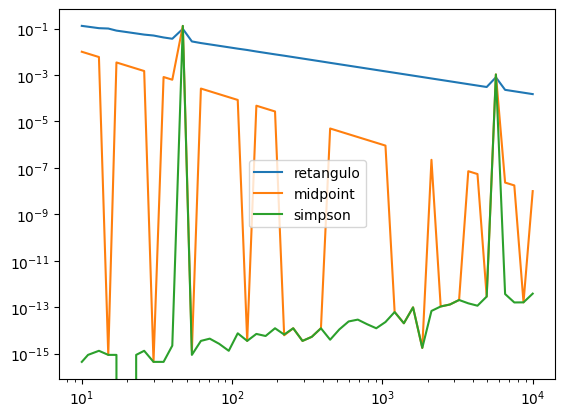

In [94]:
a,b = -1,2
ans = F(b) - F(a)
graph_err(f,a,b,ans)
plt.show()

Quais são as velocidades de convergência dos métodos?

Você percebe algum comportamento especial?  Como explicar isso?

O método do Ponto Médio também possui um grau de decaimento igual a 3, sendo, em escala logarítmica, três vezes mais rápido em convergência que o método de Cauchy, enquanto o método de Simpson tem grau 5.

Entretanto, para a função dada, tanto o Método do Ponto Médio quanto o Método de Simpson não conseguem chegar no valor exato da função no intervalo, por causa da dificuldade de aproximação provocada pela inexistência da derivada em $x=0$.

O comportamento especial é visto fortemente na aproximação do Método de Simpson. Ele, com menor número de segmentos da partição, no intervalo de integração, chega a uma aproximação melhor, aumentando o erro, por conta de trucamentos, incrementados pela dificuldade de tratar o ponto de derivada não definida, na medida em que o número de segmentos ($n$) aumenta. O erro do Método de Simpson também se comporta como um limite inferior dos erros de todos os métodos. Vê-se que, para o Método do Ponto Médio, os erros, mesmo quando ocorrem apenas por truncamento, nunca ficam abaixo do erros do Método de Simpson. 

Tanto para o Método do Ponto Médio, quanto para o Método de Simpson, existem casos específicos em que o erro se torna muito, muito baixo, provavelmente por conta de os segmentos da partição de integração dividirem o intervalo de forma que o ponto $x=0$ não seja levado em consideração para o cálculo da Integral. Isso leva a crer que talvez seja melhor fazer duas aproximações da integral da função (uma até o ponto não derivável e outra a partir do ponto não derivável) e somá-las, obtendo um resultado com menos erro de truncamento.

Agora, repita o estudo para o intervalo $[-1,1]$.

Aqui, será melhor ter um gráfico separado para cada um dos três métodos.

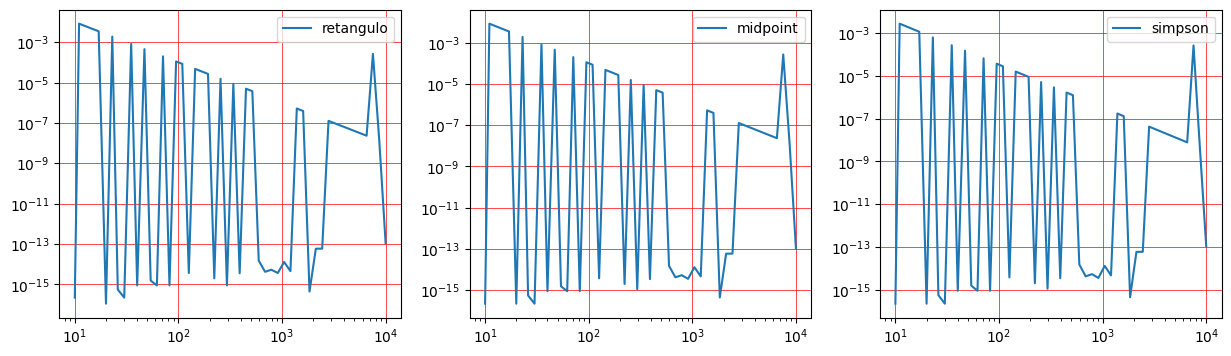

In [95]:
ans = F(1) - F(-1)
ns = np.logspace(1,4,dtype=int)
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for m,ax in zip(methods,axs):
    erros = np.array([np.abs(m(f, -1, 1, n)-ans) for n in ns])
    ax.loglog(ns, erros, label=m.__name__)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.legend()
plt.show()

O que aconteceu agora?
Porquê?

Em todos os casos, tanto os erros de aproximação, quanto os erros de truncamento, tiveram comportamentos rigorosamente iguais, apesar de os erros, no Método de Simpson, terem sido ligeiramente inferiores, em relação aos outros métodos, quando temos menos segmentos na partição do intervalo de integração.

O intervalo $[-1, 1]$ possui o ponto não derivável ($x=0$) exatamente no centro do intervalo, tornando os erros de aproximação simétricos (a função analisada é par), havendo anulamento das vantagens de aproximação dos métodos de Simpson e do Ponto Médio, e mantendo os erros de truncamento.

## Questão 4: Intervalos "aleatórios"!

Como sugerido abaixo:
- Estude em três intervalos aleatórios;
- Para cada um deles, dê a evolução dos erros dos métodos conforme $n$ aumenta.

Aqui, usar a `graph_err` vai ser uma boa ideia ;-)

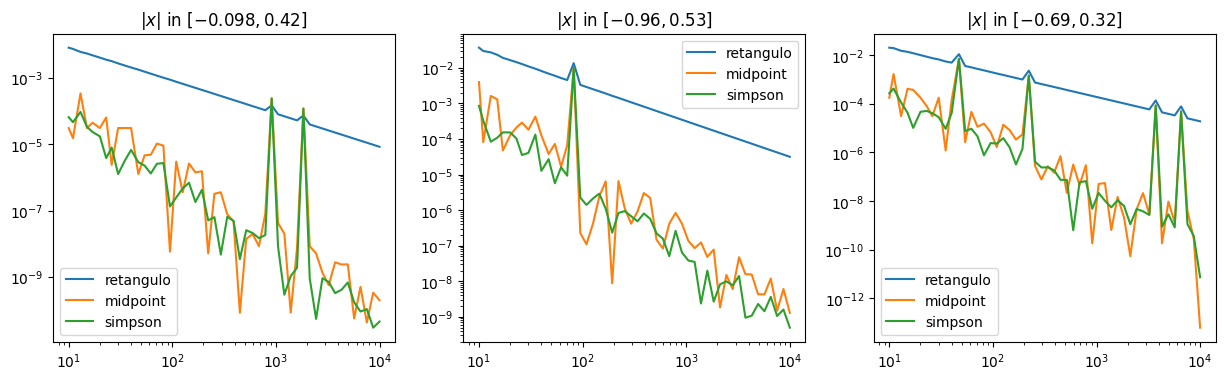

In [97]:
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for ax in axs:
    # Três intervalos aleatórios!
    a,b = -np.random.rand(), np.random.rand()
    ax.set_title('$|x|$ in $[{:.2},{:.2}]$'.format(a,b))
    plt.sca(ax) # Porque a função "graph_err" age "no eixo corrente"
    graph_err(f,a,b,F(b) - F(a))
    
plt.show()

Como você interpreta o que aconteceu?

Em todos os casos os intervalos não foram simétricos, então não houve um cancelamento dos erros ou das vantagens dos Métodos de Simpson e do Ponto Médio, em relação ao Método do Retàngulo. Assim, podemos ver as aproximações dadas pelo método do Retângulo bem menores do que as dadas pelos outros métodos.

Há flutuações das aproximações obtidas pelos métodos de Simpson e do Ponto Médio, provocadas tanto por truncamento, mas, como estão sempre em tendência de baixa, podemos assumir que há também erros de aproximação, intensificados pela presença do ponto não diferenciável dentro do intervalo.

Fica claro que os métodos de integração numérica funcionam, mesmo com a presença de um ponto não diferenciável na função.

# Parte 2: Uma função descontínua

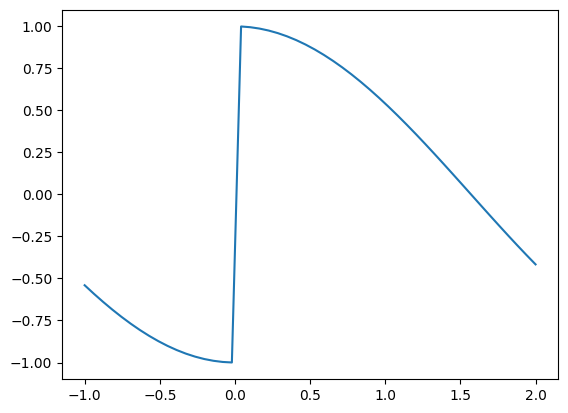

In [98]:
def g(x):
    return np.cos(x)*np.sign(x)

ts = np.linspace(-1,2)
plt.plot(ts, g(ts))
plt.show()

## Questão 5: Dê uma primitiva de $g$

In [ ]:
def G(x):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert np.abs(df(G,1) - g(1)) < 1e-12

In [ ]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(G,xs) - g(xs))/g(xs)
assert np.all(np.abs(relerr) < 5e-11)

## Questão 6: Gráficos de erro!

- Para os intervalos [-1,1] e [-1,2]

In [ ]:
_, axs = plt.subplots(ncols=2, figsize=(13,4))
# YOUR CODE HERE
raise NotImplementedError()
plt.show()

E agora para três intervalos aleatórios

In [ ]:
# Um intervalo aleatório!
_, axs = plt.subplots(ncols=3, figsize=(15,4))
# YOUR CODE HERE
raise NotImplementedError()
plt.show()

O que você pode concluir sobre o comportamento dos três métodos para funções descontínuas?

Quais fenômenos são similares para funções contínuas, mas não diferenciáveis?
Porquê?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()